In [ ]:
import numpy as np
import random
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt


#### step 1: Generate Test Data
##### Generate training data for two classes:

###### - Class A has clusters around (1.5, 0.5) and (-1.5, 0.5).
###### - Class B has a cluster around (0.0, -0.5).

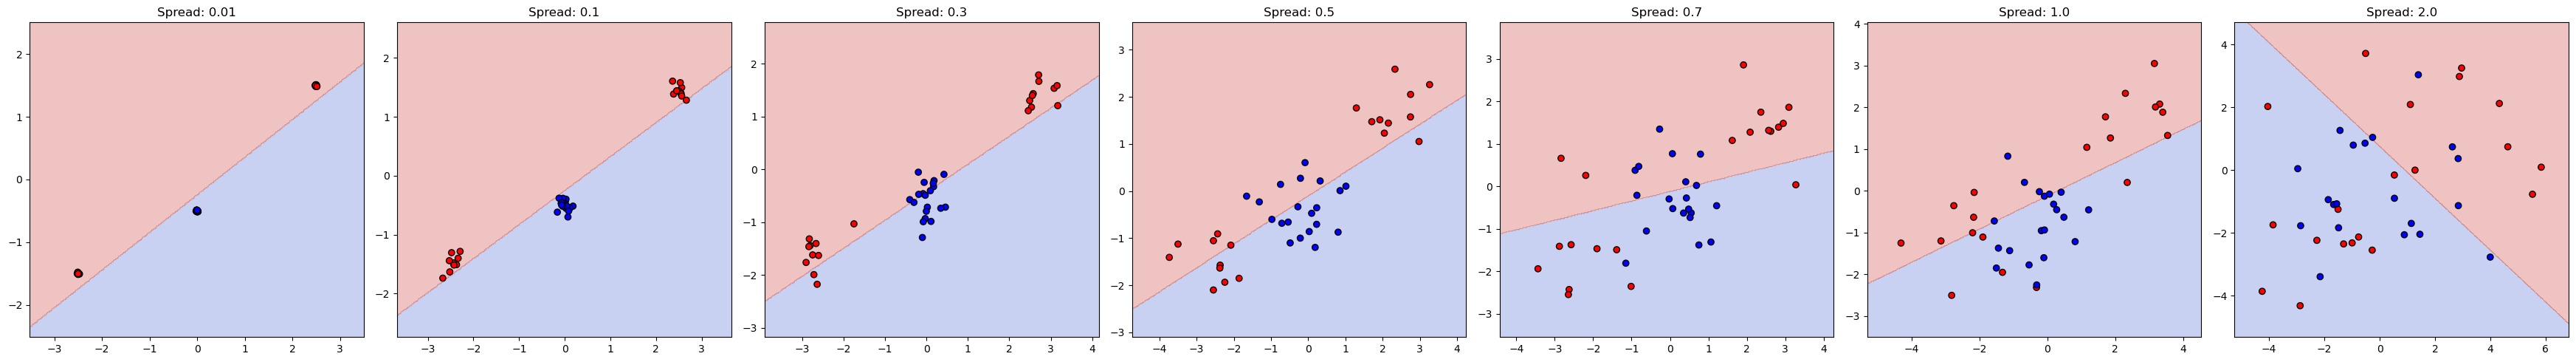

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define different spreads to test
spread_values = [0.01, 0.1, 0.3, 0.5, 0.7, 1.0, 2.0]  # Different standard deviations for clusters
num_plots = len(spread_values)

# Create figure for visualization
fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Decision boundary function
def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02  # Meshgrid step size
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    try:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    except:
        print(f"Optimizer failed for spread={title}")

    # Plot the data
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    ax.set_title(title)

# Loop over different spread values and train SVMs
for i, spread in enumerate(spread_values):
    # Generate class A (two clusters)
    classA = np.concatenate((np.random.randn(10, 2) * spread + [2.5, 1.5],
                             np.random.randn(10, 2) * spread + [-2.5, -1.5]))

    # Generate class B (single wider cluster)
    classB = np.random.randn(20, 2) * spread + [0.0, -0.5]

    # Shuffle data
    X = np.concatenate((classA, classB))
    y = np.concatenate((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))
    N = X.shape[0]
    permute = np.random.permutation(N)
    X, y = X[permute], y[permute]

    # Train SVM
    model = SVC(kernel='linear', C=1.0)
    try:
        model.fit(X, y)
        success = True
    except:
        success = False

    # Plot decision boundary if optimizer succeeded
    ax = axes[i]
    if success:
        plot_decision_boundary(ax, model, X, y, title=f"Spread: {spread}")
    else:
        ax.set_title(f"Optimizer Failed (Spread: {spread})")

# Adjust layout
plt.tight_layout()
plt.show()


#### Dimensionality of Data

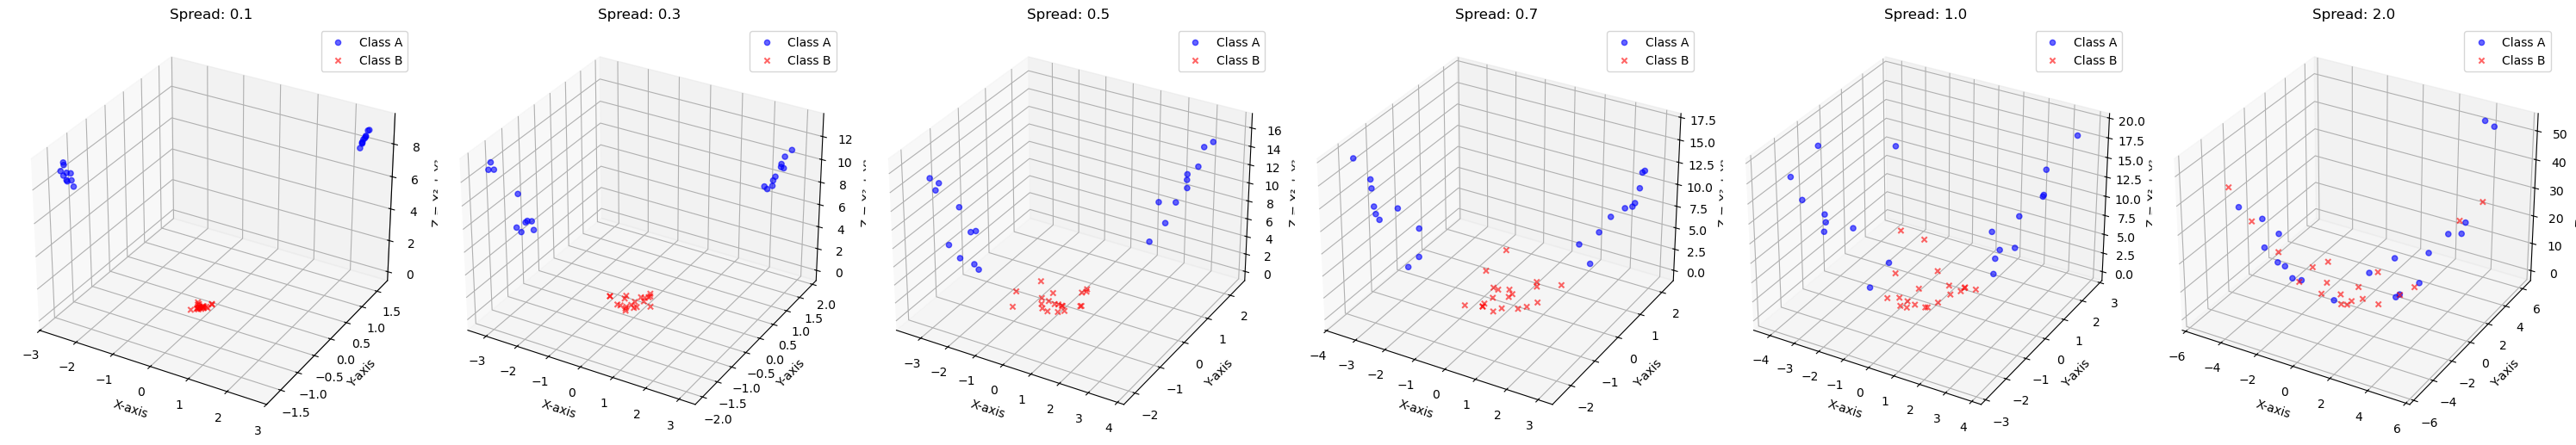

In [21]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting

# Define different spreads to test
spread_values = [0.1, 0.3, 0.5, 0.7, 1.0, 2.0]

num_plots = len(spread_values)
fig = plt.figure(figsize=(5 * num_plots, 5))

for i, spread in enumerate(spread_values):
    # Generate 2D data
    classA = np.concatenate((
        np.random.randn(10, 2) * spread + [2.5, 1.5],
        np.random.randn(10, 2) * spread + [-2.5, -1.5]
    ))

    classB = np.random.randn(20, 2) * spread + [0.0, -0.5]

    # Compute third feature (z = x^2 + y^2)
    classA_z = np.sum(classA**2, axis=1, keepdims=True)
    classB_z = np.sum(classB**2, axis=1, keepdims=True)

    # Combine into 3D dataset
    classA = np.hstack((classA, classA_z))
    classB = np.hstack((classB, classB_z))

    # Shuffle data
    inputs = np.vstack((classA, classB))
    targets = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))
    permute = np.random.permutation(len(inputs))
    inputs, targets = inputs[permute], targets[permute]

    # 3D visualization
    ax = fig.add_subplot(1, num_plots, i+1, projection='3d')
    ax.scatter(inputs[targets == 1, 0], inputs[targets == 1, 1], inputs[targets == 1, 2], c='b', marker='o', label='Class A', alpha=0.6)
    ax.scatter(inputs[targets == -1, 0], inputs[targets == -1, 1], inputs[targets == -1, 2], c='r', marker='x', label='Class B', alpha=0.6)

    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z = X² + Y²")
    ax.set_title(f"Spread: {spread}")
    ax.legend()

plt.tight_layout()
plt.show()


#### adversarial noise (adding confusing points)

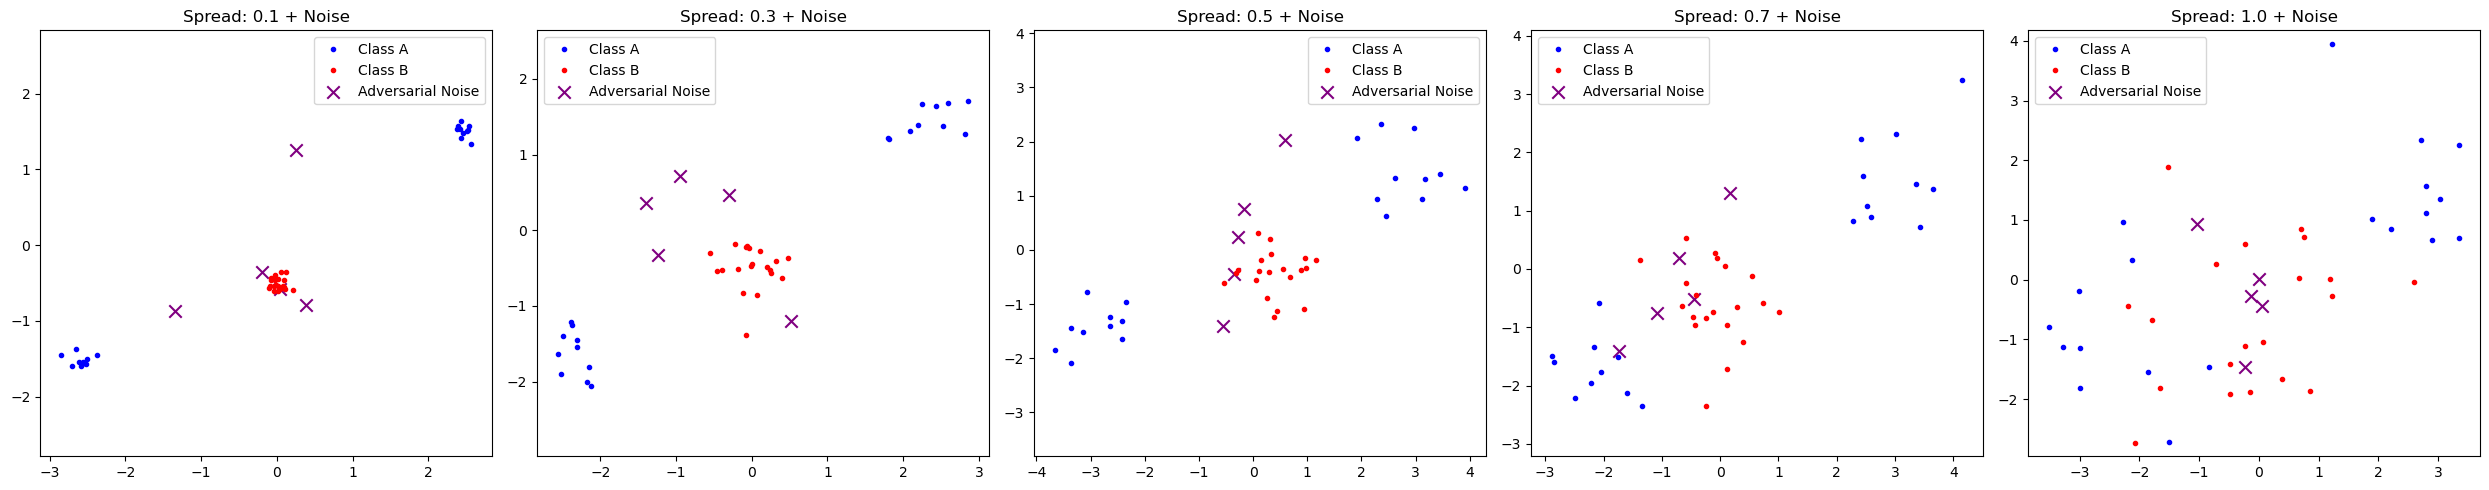

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define different spreads to test (modify this list to generate more graphs)
spread_values = [0.1, 0.3, 0.5, 0.7, 1.0]  # Different standard deviations for clusters

# Define the number of plots based on spread values
num_plots = len(spread_values)

# Create a figure with multiple subplots
fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

# Loop over different spread values and generate plots
for i, spread in enumerate(spread_values):
    # Generate class A (two clusters)
    classA = np.concatenate((
        np.random.randn(10, 2) * spread + [2.5, 1.5],
        np.random.randn(10, 2) * spread + [-2.5, -1.5]
    ))

    # Generate class B (single wider cluster)
    classB = np.random.randn(20, 2) * spread + [0.0, -0.5]

    # ✅ ADD ADVERSARIAL NOISE POINTS (Near the decision boundary)
    num_noise_points = 5  # Adjust for testing different levels of noise
    noise = np.random.randn(num_noise_points, 2) * 0.9  # Small noise spread near (0,0) noise level
    noise_labels = np.random.choice([-1, 1], num_noise_points)  # Randomly assign to either class

    # Combine datasets
    inputs = np.concatenate((classA, classB, noise))
    targets = np.concatenate((np.ones(classA.shape[0]), -np.ones(classB.shape[0]), noise_labels))

    # Shuffle data
    N = inputs.shape[0]
    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]

    # Plot the data in respective subplot
    ax = axes[i]
    ax.plot(classA[:, 0], classA[:, 1], 'b.', label="Class A")
    ax.plot(classB[:, 0], classB[:, 1], 'r.', label="Class B")
    ax.scatter(noise[:, 0], noise[:, 1], color='purple', marker='x', label="Adversarial Noise", s=80)  # Mark outliers
    ax.set_title(f"Spread: {spread} + Noise")
    ax.axis('equal')
    ax.legend()

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


#### Multi-Class SVM (One-vs-One vs. One-vs-Rest)

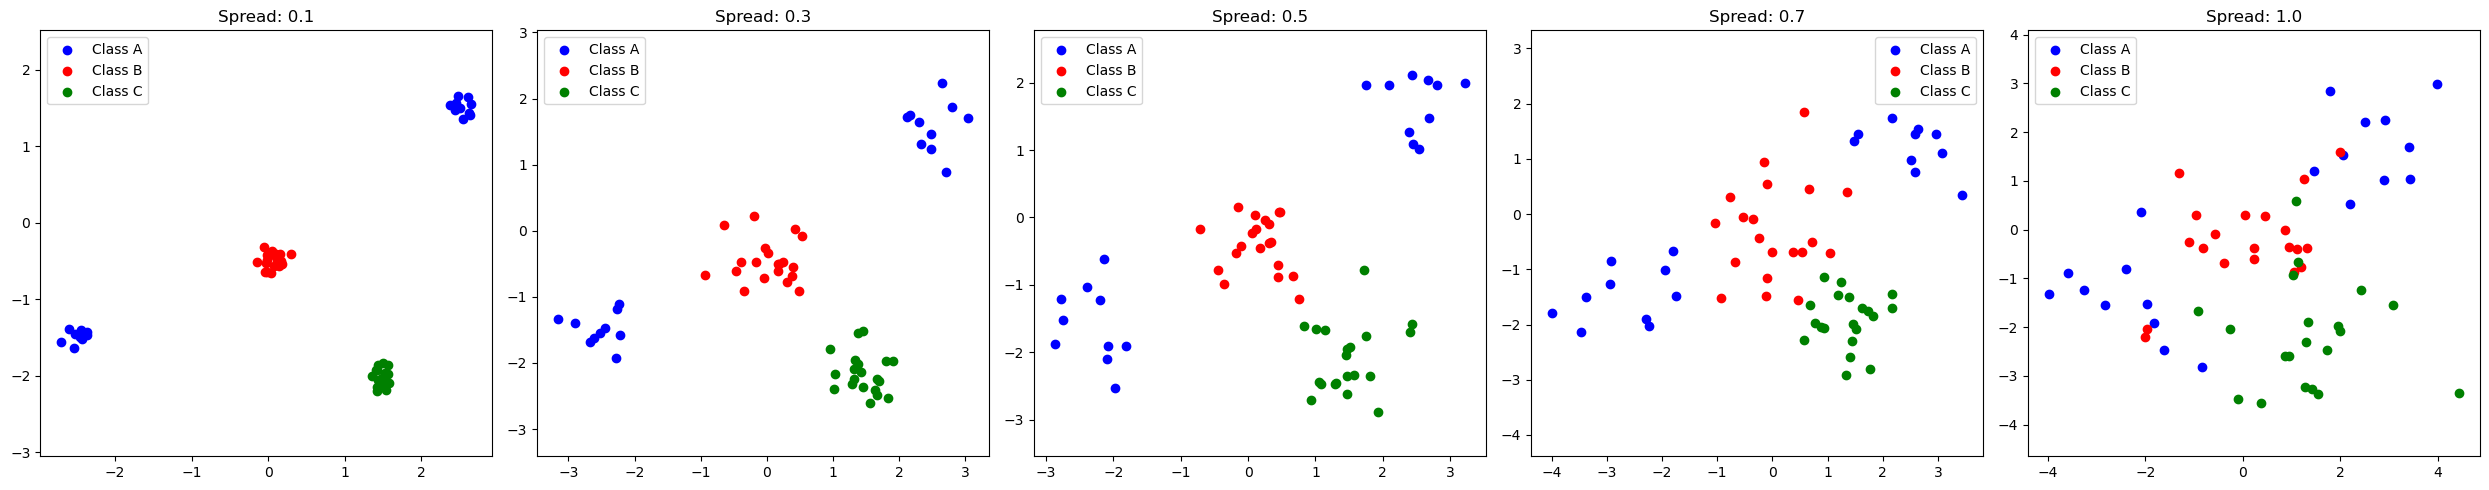

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define different spreads to test
spread_values = [0.1, 0.3, 0.5, 0.7, 1.0]  # Different standard deviations for clusters
num_plots = len(spread_values)

fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5))

for i, spread in enumerate(spread_values):
    # Generate class A (two clusters)
    classA = np.concatenate((
        np.random.randn(10, 2) * spread + [2.5, 1.5],
        np.random.randn(10, 2) * spread + [-2.5, -1.5]
    ))

    # Generate class B (single wider cluster)
    classB = np.random.randn(20, 2) * spread + [0.0, -0.5]

    # **NEW: Generate Class C (Additional Cluster)**
    classC = np.random.randn(20, 2) * spread + [1.5, -2.0]

    # Combine all data and labels
    inputs = np.concatenate((classA, classB, classC))
    targets = np.concatenate((np.ones(classA.shape[0]), np.full(classB.shape[0], 2), np.full(classC.shape[0], 3)))

    # Shuffle data
    N = inputs.shape[0]
    permute = list(range(N))
    random.shuffle(permute)
    inputs = inputs[permute, :]
    targets = targets[permute]

    # Plot data
    ax = axes[i]
    ax.scatter(classA[:, 0], classA[:, 1], color='blue', label="Class A")
    ax.scatter(classB[:, 0], classB[:, 1], color='red', label="Class B")
    ax.scatter(classC[:, 0], classC[:, 1], color='green', label="Class C")  # New Class C
    ax.set_title(f"Spread: {spread}")
    ax.axis('equal')
    ax.legend()

plt.tight_layout()
plt.show()


#### step 2: Define Kernel Functions
##### Implement different kernel functions:

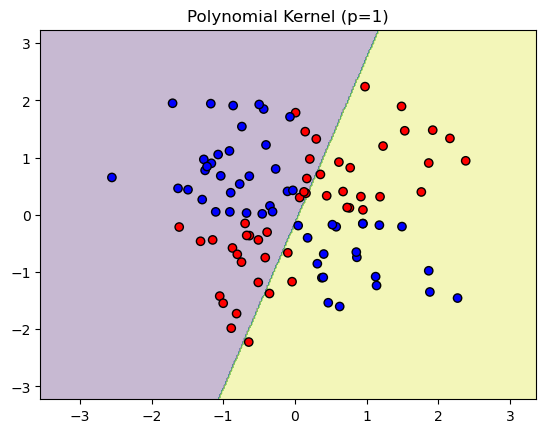

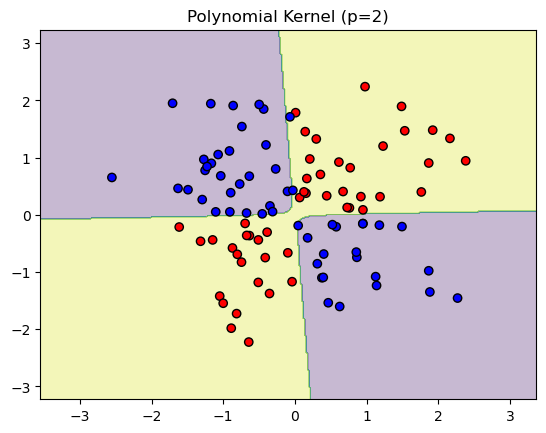

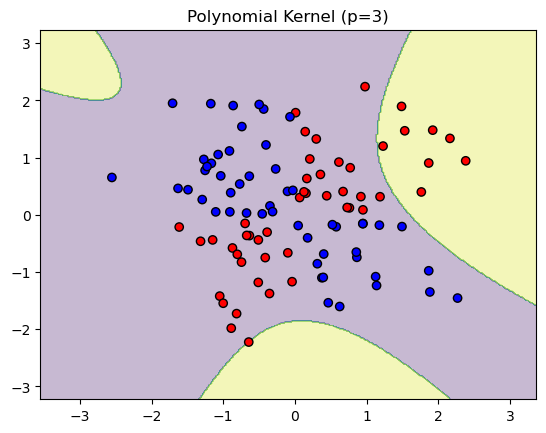

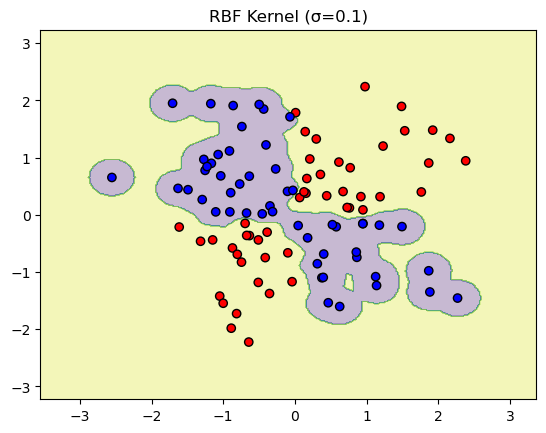

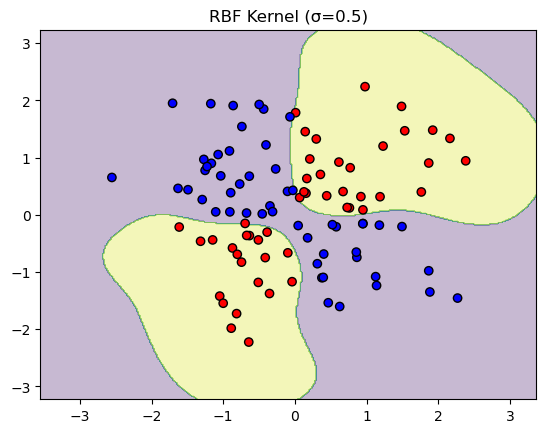

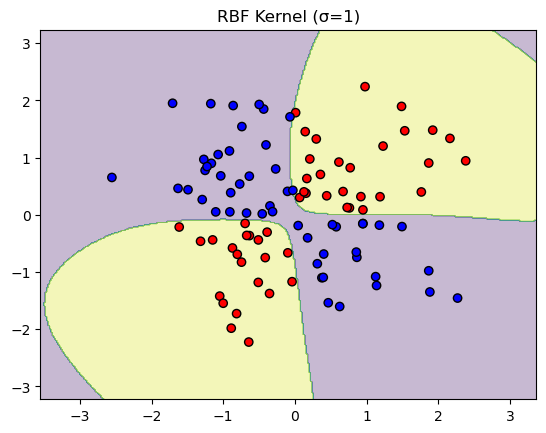

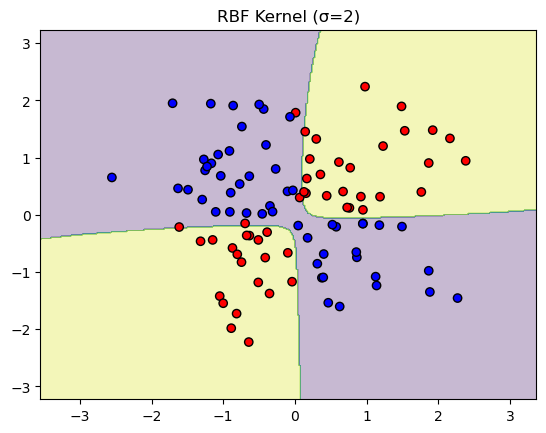

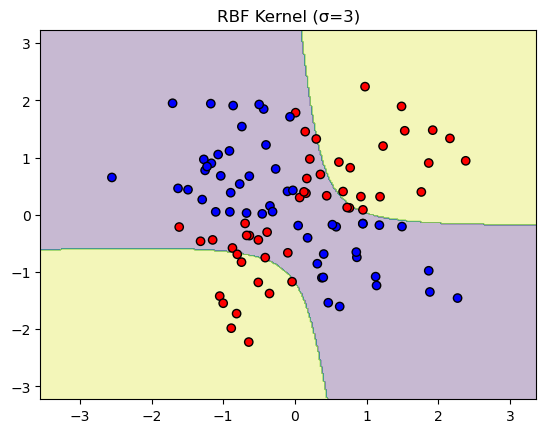

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define Kernel Functions
def linear_kernel(x, y):
    return np.dot(x, y)

def polynomial_kernel(x, y, p=3):
    return (np.dot(x, y) + 1) ** p

def rbf_kernel(x, y, sigma=1):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

# Generate Synthetic Data
np.random.seed(0)
N = 100
X = np.random.randn(N, 2)
y = np.sign(X[:, 0] * X[:, 1])  # Non-linearly separable dataset

# Define different kernel settings for testing
kernel_types = ['poly', 'rbf']
poly_degrees = [1, 2, 3]  # Experimenting with different polynomial degrees
sigma_values = [0.1,0.5, 1, 2, 3]  # Experimenting with different RBF sigma values

# Visualization Function
def plot_decision_boundary(model, X, y, title):
    """Plots the decision boundary for a trained SVM model."""
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)
    plt.show()

# Train and Test Different Kernel Configurations
for kernel in kernel_types:
    if kernel == 'poly':
        
        for p in poly_degrees:
            model = SVC(kernel='poly', degree=p, C=1.0)
            model.fit(X, y)
            plot_decision_boundary(model, X, y, f'Polynomial Kernel (p={p})')
        

    elif kernel == 'rbf':
        
        for sigma in sigma_values:
            model = SVC(kernel='rbf', gamma=1/(2*sigma**2), C=1.0)
            model.fit(X, y)
            plot_decision_boundary(model, X, y, f'RBF Kernel (σ={sigma})')
        


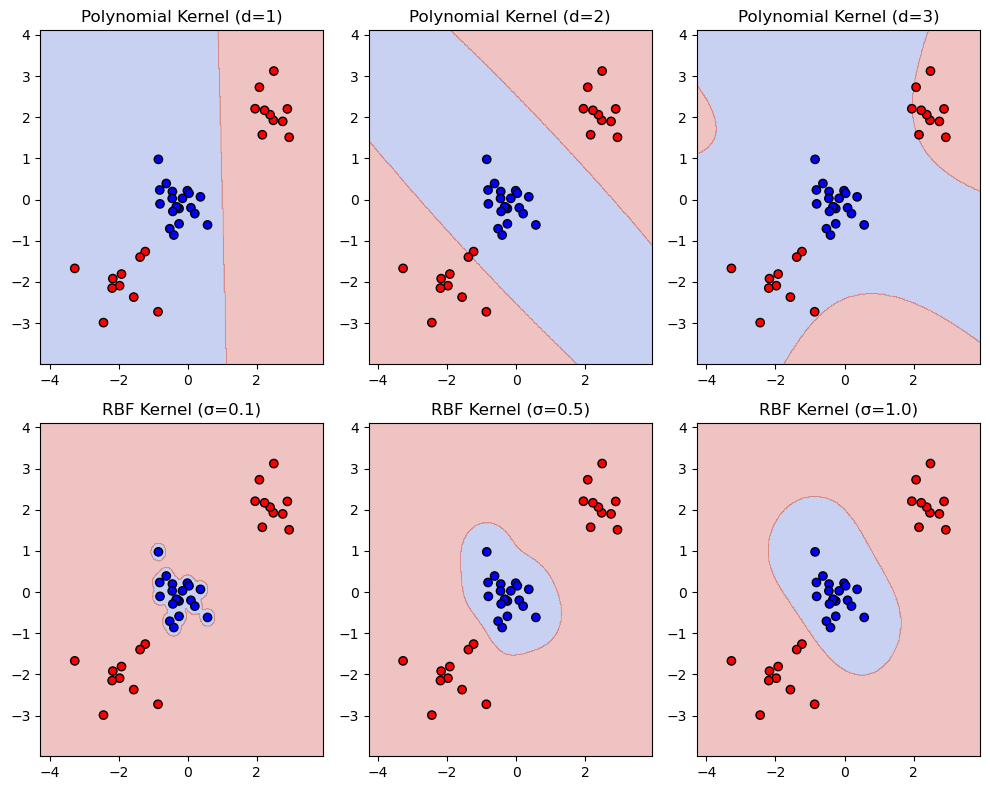

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.svm import SVC

# Generate a more complex dataset
np.random.seed(0)
classA = np.vstack((np.random.randn(10, 2) * 0.5 + [2, 2], np.random.randn(10, 2) * 0.5 + [-2, -2]))
classB = np.random.randn(20, 2) * 0.5 + np.array([0, 0])

X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    """Plots the decision boundary for a trained SVM model."""
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)

# Different kernel configurations
polynomial_degrees = [1,2, 3]  # Polynomial kernel degrees
sigma_values = [0.1, 0.5, 1.0]  # RBF kernel sigma values

plt.figure(figsize=(10, 8))

# Train and plot for polynomial kernel with different degrees
for i, degree in enumerate(polynomial_degrees):
    model = SVC(kernel='poly', degree=degree, C=1.0)
    model.fit(X, y)
    
    plt.subplot(2, len(polynomial_degrees), i + 1)
    plot_decision_boundary(model, X, y, title=f"Polynomial Kernel (d={degree})")



# Train and plot for RBF kernel with different sigma values
for i, sigma in enumerate(sigma_values):
    gamma = 1 / (2 * sigma**2)  # Convert sigma to gamma
    model = SVC(kernel='rbf', gamma=gamma, C=1.0)
    model.fit(X, y)
    
    plt.subplot(2, len(sigma_values), len(polynomial_degrees) + i + 1)
    plot_decision_boundary(model, X, y, title=f"RBF Kernel (σ={sigma})")


plt.tight_layout()
plt.show()


#### Kernel Composition (Combining Multiple Kernels)

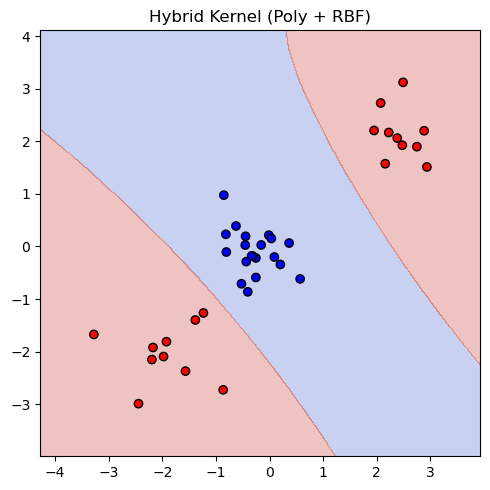

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate dataset
np.random.seed(0)
classA = np.vstack((np.random.randn(10, 2) * 0.5 + [2, 2], np.random.randn(10, 2) * 0.5 + [-2, -2]))
classB = np.random.randn(20, 2) * 0.5 + np.array([0, 0])

X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Define Kernel Functions
def linear_kernel(x, y):
    return np.dot(x, y)

def polynomial_kernel(x, y, p=3):
    return (np.dot(x, y) + 1) ** p

def rbf_kernel(x, y, sigma=1):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

# Define Hybrid Kernel Function
def hybrid_kernel(X, Y):
    """Combines Polynomial and RBF kernels"""
    N, M = X.shape[0], Y.shape[0]  # Number of samples
    hybrid_matrix = np.zeros((N, M))

    for i in range(N):
        for j in range(M):
            poly_part = polynomial_kernel(X[i], Y[j], p=3)  # Polynomial degree = 3
            rbf_part = rbf_kernel(X[i], Y[j], sigma=0.5)  # RBF sigma = 0.5
            linear_part= linear_kernel(X[i], Y[j])
            hybrid_matrix[i, j] = 0.3 * poly_part + 0.3 * rbf_part + 0.3 * linear_part  # Weighted combination
    
    return hybrid_matrix

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    """Plots the decision boundary for a trained SVM model with precomputed kernel"""
    h = 0.02  # Step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Compute kernel matrix for new points
    X_test = np.c_[xx.ravel(), yy.ravel()]
    K_test = hybrid_kernel(X_test, X)  # Precompute kernel for test points

    # Predict using the precomputed kernel
    Z = model.predict(K_test)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)

# Train and plot for Hybrid Kernel
plt.figure(figsize=(5, 5))

# Compute kernel matrix for training data
K_train = hybrid_kernel(X, X)

# Train SVM with precomputed kernel
model = SVC(kernel="precomputed", C=1.0)
model.fit(K_train, y)

# Plot decision boundary for Hybrid Kernel
plot_decision_boundary(model, X, y, title="Hybrid Kernel (Poly + RBF)")

plt.tight_layout()
plt.show()


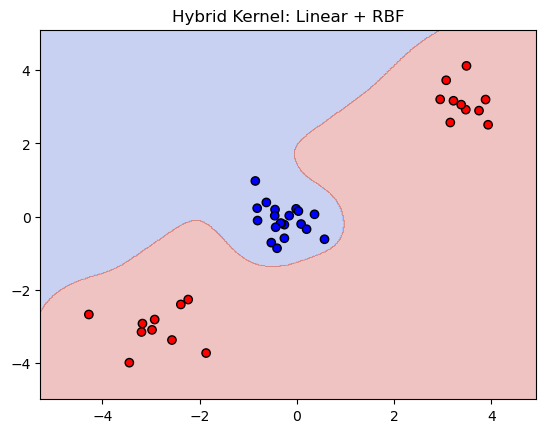

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate a dataset that is mostly linearly separable but has local clusters
np.random.seed(0)
classA = np.concatenate((np.random.randn(10, 2) * 0.5 + [3, 3], np.random.randn(10, 2) * 0.5 + [-3, -3]))
classB = np.random.randn(20, 2) * 0.5 + [0, 0]

X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Define Linear + RBF Hybrid Kernel
def hybrid_kernel(X, Y):
    linear_part = np.dot(X, Y.T)  # Linear component
    rbf_part = np.exp(-np.linalg.norm(X[:, None] - Y, axis=2) ** 2 / (2 * 0.5 ** 2))  # RBF component
    return 0.5 * linear_part + 0.5 * rbf_part  # Weighted sum

# Train SVM with precomputed kernel
K_train = hybrid_kernel(X, X)
model = SVC(kernel="precomputed", C=1.0)
model.fit(K_train, y)

# Decision boundary visualization

def plot_decision_boundary(title="Hybrid Kernel: Linear + RBF"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    X_test = np.c_[xx.ravel(), yy.ravel()]
    K_test = hybrid_kernel(X_test, X)  # Compute kernel for test points
    Z = model.predict(K_test).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)
    plt.show()


plot_decision_boundary()


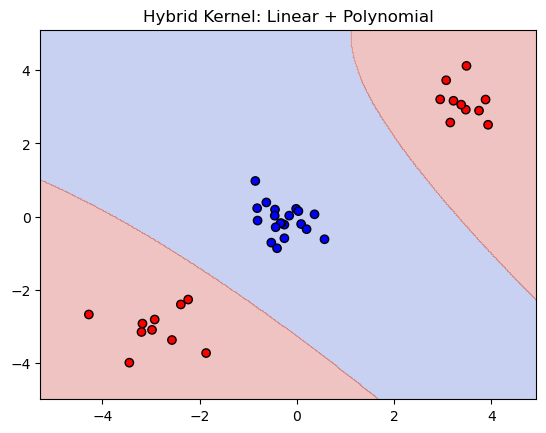

In [9]:
# Define Linear + Polynomial Hybrid Kernel
def hybrid_kernel(X, Y):
    linear_part = np.dot(X, Y.T)  # Linear component
    poly_part = (np.dot(X, Y.T) + 1) ** 3  # Polynomial degree 3
    return 0.5 * linear_part + 0.5 * poly_part  # Weighted sum

# Train SVM with precomputed kernel
K_train = hybrid_kernel(X, X)
model = SVC(kernel="precomputed", C=1.0)
model.fit(K_train, y)

# Plot decision boundary
plot_decision_boundary("Hybrid Kernel: Linear + Polynomial")


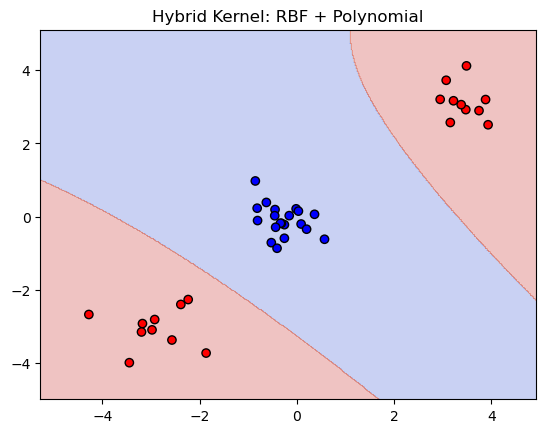

In [10]:
# Define RBF + Polynomial Hybrid Kernel
def hybrid_kernel(X, Y):
    rbf_part = np.exp(-np.linalg.norm(X[:, None] - Y, axis=2) ** 2 / (2 * 0.5 ** 2))  # RBF component
    poly_part = (np.dot(X, Y.T) + 1) ** 3  # Polynomial degree 3
    return 0.5 * rbf_part + 0.5 * poly_part  # Weighted sum

# Train SVM with precomputed kernel
K_train = hybrid_kernel(X, X)
model = SVC(kernel="precomputed", C=1.0)
model.fit(K_train, y)

# Plot decision boundary
plot_decision_boundary("Hybrid Kernel: RBF + Polynomial")


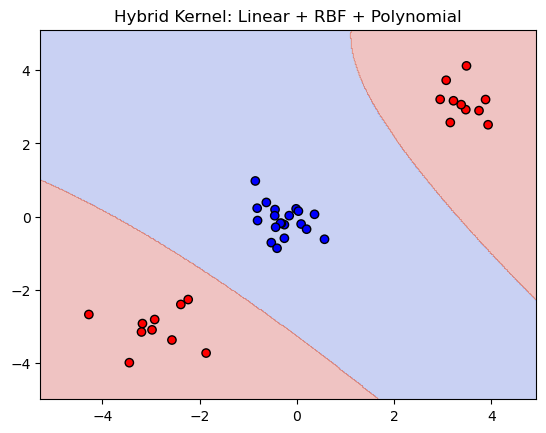

In [11]:
# Define Linear + RBF + Polynomial Hybrid Kernel
def hybrid_kernel(X, Y):
    linear_part = np.dot(X, Y.T)  # Linear component
    rbf_part = np.exp(-np.linalg.norm(X[:, None] - Y, axis=2) ** 2 / (2 * 0.5 ** 2))  # RBF component
    poly_part = (np.dot(X, Y.T) + 1) ** 3  # Polynomial degree 3
    return (1/3) * linear_part + (1/3) * rbf_part + (1/3) * poly_part  # Weighted sum

# Train SVM with precomputed kernel
K_train = hybrid_kernel(X, X)
model = SVC(kernel="precomputed", C=1.0)
model.fit(K_train, y)

# Plot decision boundary
plot_decision_boundary("Hybrid Kernel: Linear + RBF + Polynomial")


#### Different Distance Metrics (Modify Kernel Function)
##### Idea: Instead of Euclidean distance, try Manhattan or Mahalanobis distance in RBF kernel.

Effect:
Can change how SVM measures similarity between points.
Useful for non-Euclidean data.

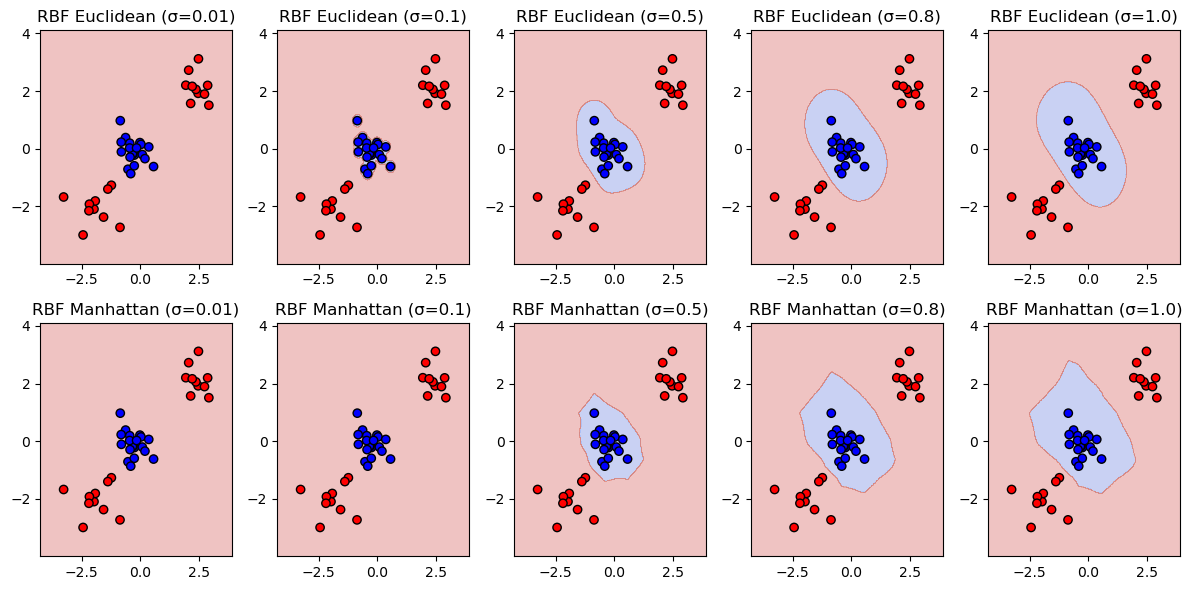

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import euclidean_distances, manhattan_distances

# Custom kernel functions
def rbf_manhattan(X, Y, sigma=0.5):
    return np.exp(-manhattan_distances(X, Y) / (2 * sigma ** 2))

def rbf_euclidean(X, Y, sigma=0.5):
    return np.exp(-euclidean_distances(X, Y)**2 / (2 * sigma ** 2))

def plot_decision_boundary(model, X, y, title, kernel_func, sigma):
    """Plots the decision boundary for an SVM trained with a precomputed kernel."""
    h = 0.02  # Step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Compute kernel between grid points and training data
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    K_grid = kernel_func(grid_points, X, sigma)

    Z = model.predict(K_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.title(title)

# Generate dataset
np.random.seed(0)
classA = np.vstack((np.random.randn(10, 2) * 0.5 + [2, 2], np.random.randn(10, 2) * 0.5 + [-2, -2]))
classB = np.random.randn(20, 2) * 0.5 + np.array([0, 0])

X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Compute kernel matrices
sigma_values = [0.01 ,0.1, 0.5,0.8, 1.0]

plt.figure(figsize=(12, 6))

for i, sigma in enumerate(sigma_values):
    # Compute Kernel Matrices
    K_euclidean = rbf_euclidean(X, X, sigma)
    K_manhattan = rbf_manhattan(X, X, sigma)

    # Train SVM with precomputed kernels
    model_euclidean = SVC(kernel="precomputed", C=1.0)
    model_manhattan = SVC(kernel="precomputed", C=1.0)
    model_euclidean.fit(K_euclidean, y)
    model_manhattan.fit(K_manhattan, y)

    # Plot Euclidean Kernel Decision Boundary
    plt.subplot(2, len(sigma_values), i + 1)
    plot_decision_boundary(model_euclidean, X, y, title=f"RBF Euclidean (σ={sigma})", kernel_func=rbf_euclidean, sigma=sigma)

    # Plot Manhattan Kernel Decision Boundary
    plt.subplot(2, len(sigma_values), len(sigma_values) + i + 1)
    plot_decision_boundary(model_manhattan, X, y, title=f"RBF Manhattan (σ={sigma})", kernel_func=rbf_manhattan, sigma=sigma)

plt.tight_layout()
plt.show()


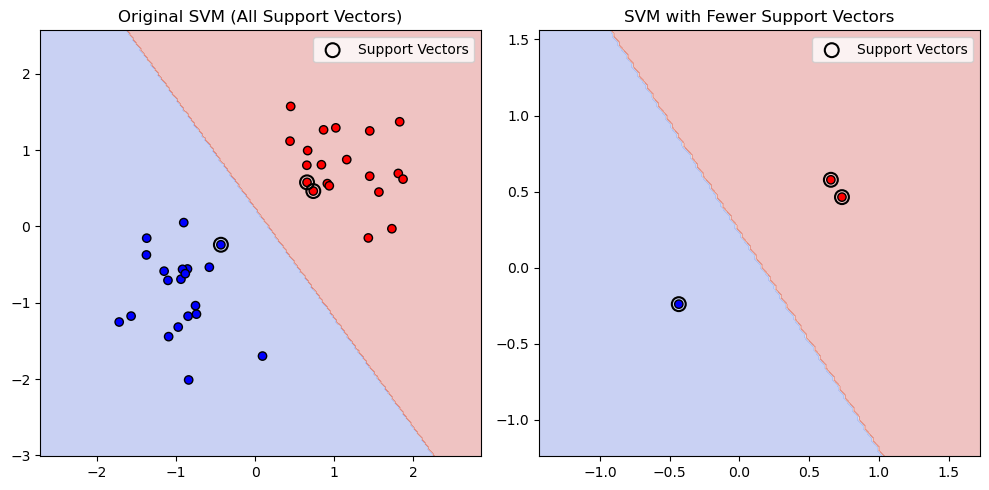

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate dataset with controlled support vectors
np.random.seed(1)
classA = np.random.randn(20, 2) * 0.5 + [1, 1]
classB = np.random.randn(20, 2) * 0.5 + [-1, -1]
X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Train an SVM to get support vectors
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# Get support vectors and their corresponding class labels
support_vectors = model.support_vectors_
support_vector_indices = model.support_  # Indices in the original dataset
support_vector_labels = y[support_vector_indices]

# **Remove a percentage of support vectors BUT ensure both classes remain**
reduction_factor = 0.5  # Remove 50% of support vectors
num_to_remove = int(len(support_vectors) * reduction_factor)

# Separate support vectors by class
classA_sv = support_vectors[support_vector_labels == 1]
classB_sv = support_vectors[support_vector_labels == -1]

# Ensure at least one support vector from each class remains
if len(classA_sv) > 1 and len(classB_sv) > 1:
    classA_sv_reduced = classA_sv[num_to_remove // 2:]  # Remove half from class A
    classB_sv_reduced = classB_sv[num_to_remove // 2:]  # Remove half from class B
else:
    classA_sv_reduced = classA_sv  # Keep all if too few
    classB_sv_reduced = classB_sv

# Combine back the filtered support vectors
filtered_support_vectors = np.vstack((classA_sv_reduced, classB_sv_reduced))
filtered_labels = np.hstack((np.ones(len(classA_sv_reduced)), -np.ones(len(classB_sv_reduced))))

# Train a new model using fewer support vectors
model_reduced = SVC(kernel='linear', C=1.0)
model_reduced.fit(filtered_support_vectors, filtered_labels)

# Plot Decision Boundaries for Both Models
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    
    # Highlight support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', linewidth=1.5, label="Support Vectors")
    
    plt.title(title)
    plt.legend()

# Plot comparison of normal SVM vs. Reduced Support Vector SVM
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(model, X, y, title="Original SVM (All Support Vectors)")

plt.subplot(1, 2, 2)
plot_decision_boundary(model_reduced, filtered_support_vectors, filtered_labels, title="SVM with Fewer Support Vectors")

plt.tight_layout()
plt.show()


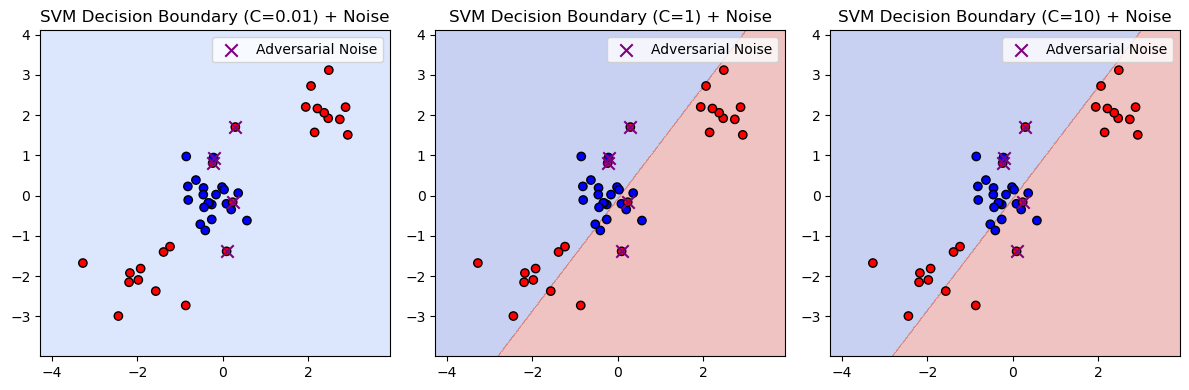

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate dataset with adversarial noise
np.random.seed(0)
classA = np.vstack((np.random.randn(10, 2) * 0.5 + [2, 2], np.random.randn(10, 2) * 0.5 + [-2, -2]))
classB = np.random.randn(20, 2) * 0.5 + np.array([0, 0])

# ✅ ADD ADVERSARIAL NOISE POINTS
num_noise_points = 5
#noise = np.random.uniform(low=-0.1, high=0.9, size=(num_noise_points, 2)) # Uniform Noise instead of Gaussian
noise = np.random.randn(num_noise_points, 2) * [0.2, 0.9]  # Different spread in X and Y

#noise = np.random.randn(num_noise_points, 2) * 0.2  # Small noise near (0,0)
noise_labels = np.random.choice([-1, 1], num_noise_points)  # Randomly assign to class A or B

# Combine datasets
X = np.vstack((classA, classB, noise))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0]), noise_labels))

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.02  # Step size of the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    plt.scatter(noise[:, 0], noise[:, 1], color='purple', marker='x', s=80, label="Adversarial Noise")  # Mark outliers
    plt.title(title)
    plt.legend()

# Train SVM and plot decision boundary
C_values = [0.01, 1, 10]  # Test effect of slack parameter

plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    plt.subplot(1, len(C_values), i + 1)
    plot_decision_boundary(model, X, y, title=f"SVM Decision Boundary (C={C}) + Noise")

plt.tight_layout()
plt.show()


##### Dimensionality of Data

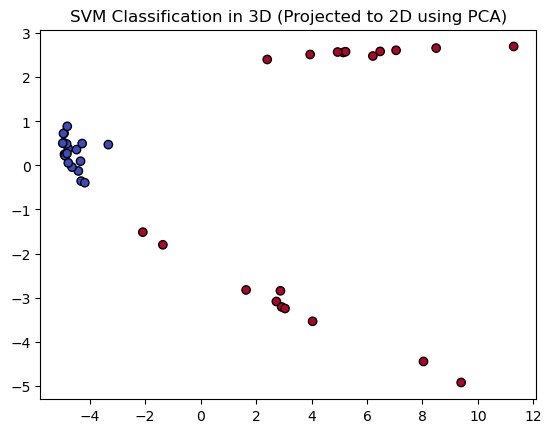

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Generate 2D data
np.random.seed(0)
classA = np.vstack((np.random.randn(10, 2) * 0.5 + [2, 2], np.random.randn(10, 2) * 0.5 + [-2, -2]))
classB = np.random.randn(20, 2) * 0.5 + np.array([0, 0])

# Add third feature (z = x^2 + y^2)
classA_z = np.sum(classA**2, axis=1, keepdims=True)
classB_z = np.sum(classB**2, axis=1, keepdims=True)
classA = np.hstack((classA, classA_z))
classB = np.hstack((classB, classB_z))

X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Train SVM with RBF kernel on 3D data
model = SVC(kernel='rbf', gamma=0.5, C=1.0)
model.fit(X, y)

# Reduce back to 2D using PCA for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("SVM Classification in 3D (Projected to 2D using PCA)")
plt.show()


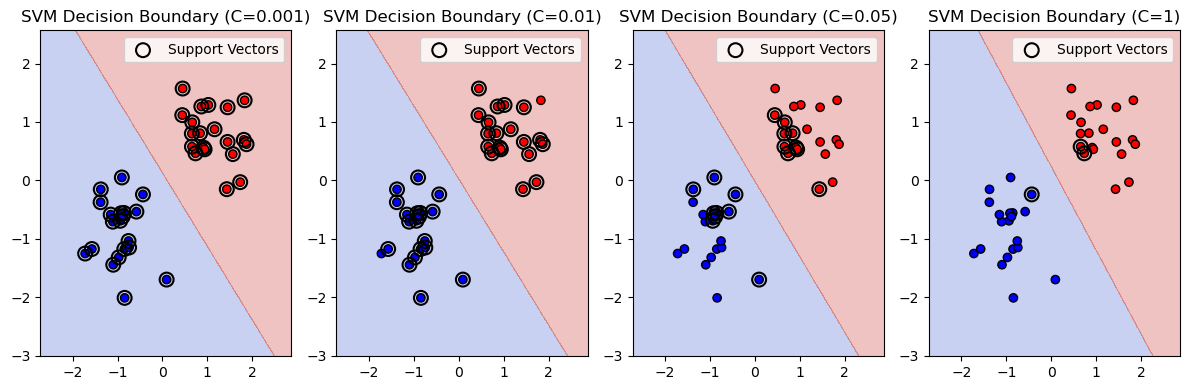

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate dataset with some overlap
np.random.seed(1)
classA = np.random.randn(20, 2) * 0.5 + [1, 1]
classB = np.random.randn(20, 2) * 0.5 + [-1, -1]
X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.01  # Step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    
    # Highlight support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', linewidth=1.5, label="Support Vectors")
    
    plt.title(title)
    plt.legend()

# Different C values to test
C_values = [0.001, 0.01, 0.05, 1]

plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    plt.subplot(1, len(C_values), i + 1)
    plot_decision_boundary(model, X, y, title=f"SVM Decision Boundary (C={C})")

plt.tight_layout()
plt.show()


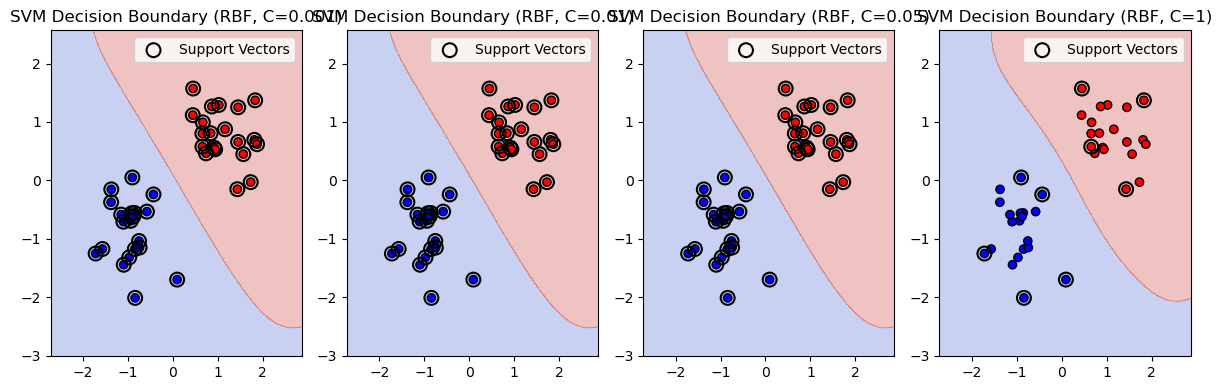

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate dataset with some overlap
np.random.seed(1)
classA = np.random.randn(20, 2) * 0.5 + [1, 1]
classB = np.random.randn(20, 2) * 0.5 + [-1, -1]
X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.01  # Step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    
    # Highlight support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', linewidth=1.5, label="Support Vectors")
    
    plt.title(title)
    plt.legend()

# Different C values to test
C_values = [0.001, 0.01, 0.05, 1]

plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='rbf', C=C)  # Use RBF kernel
    model.fit(X, y)

    plt.subplot(1, len(C_values), i + 1)
    plot_decision_boundary(model, X, y, title=f"SVM Decision Boundary (RBF, C={C})")

plt.tight_layout()
plt.show()


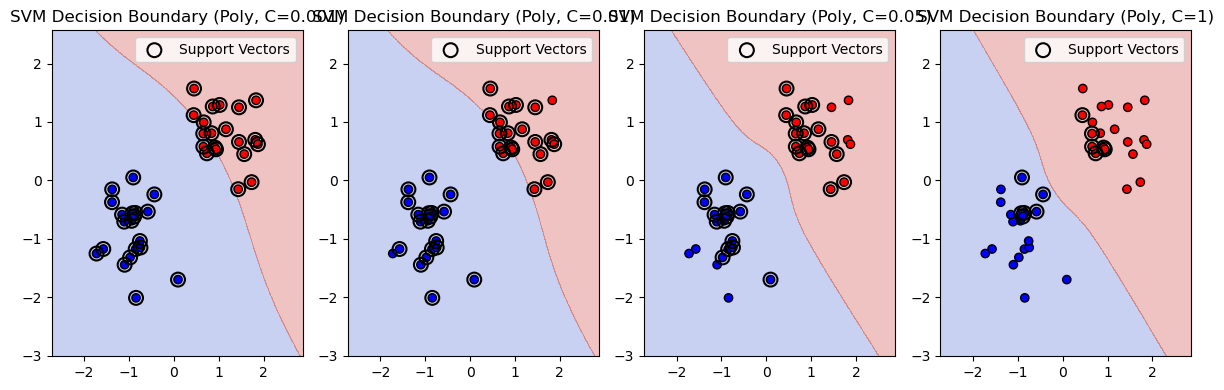

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate dataset with some overlap
np.random.seed(1)
classA = np.random.randn(20, 2) * 0.5 + [1, 1]
classB = np.random.randn(20, 2) * 0.5 + [-1, -1]
X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.01  # Step size for meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    
    # Highlight support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', linewidth=1.5, label="Support Vectors")
    
    plt.title(title)
    plt.legend()

# Different C values to test
C_values = [0.001, 0.01, 0.05, 1]

plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='poly', degree=3, C=C)  # Use Polynomial kernel with degree 3
    model.fit(X, y)

    plt.subplot(1, len(C_values), i + 1)
    plot_decision_boundary(model, X, y, title=f"SVM Decision Boundary (Poly, C={C})")

plt.tight_layout()
plt.show()


##### Dimensionality of Data

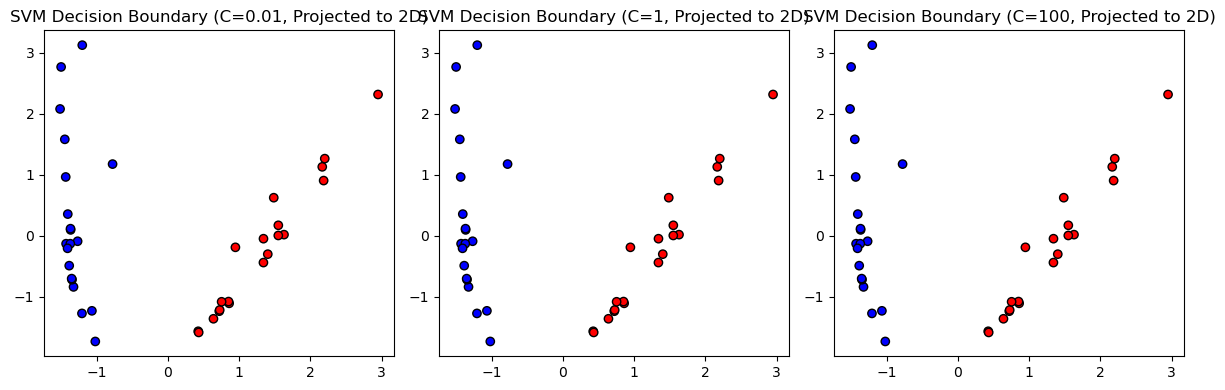

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Generate dataset
np.random.seed(1)
classA = np.random.randn(20, 2) * 0.5 + [1, 1]
classB = np.random.randn(20, 2) * 0.5 + [-1, -1]

# Add third feature (z = x^2 + y^2)
classA_z = np.sum(classA**2, axis=1, keepdims=True)
classB_z = np.sum(classB**2, axis=1, keepdims=True)
classA = np.hstack((classA, classA_z))
classB = np.hstack((classB, classB_z))

X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Train SVM
C_values = [0.01, 1, 100]
plt.figure(figsize=(12, 4))

for i, C in enumerate(C_values):
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)

    # Project to 2D using PCA
    X_reduced = PCA(n_components=2).fit_transform(X)

    plt.subplot(1, len(C_values), i + 1)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.bwr, edgecolors='k')
    plt.title(f"SVM Decision Boundary (C={C}, Projected to 2D)")

plt.tight_layout()
plt.show()


ValueError: X has 2 features, but SVC is expecting 3 features as input.

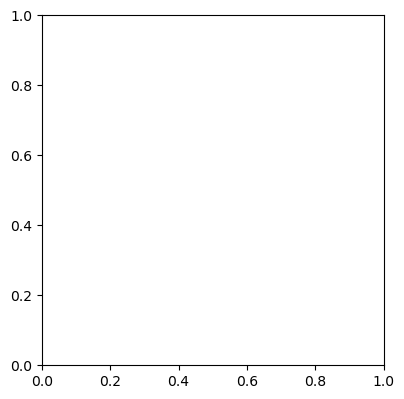

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics.pairwise import polynomial_kernel, rbf_kernel




# Define hybrid kernel function
def hybrid_kernel(X, Y):
    """Combines Polynomial and RBF kernels"""
    poly_part = polynomial_kernel(X, Y, degree=3)  # Adjust degree if needed
    rbf_part = rbf_kernel(X, Y, gamma=0.5)  # Adjust gamma if needed
    return 0.5 * poly_part + 0.5 * rbf_part  # Weighted combination


model = SVC(kernel='rbf', gamma=gamma, C=1.0)
model = SVC(kernel='poly', degree=degree, C=1.0)
model = SVC(kernel=hybrid_kernel, C=1.0)  # Use hybrid kernel
model.fit(X, y)

plt.figure(figsize=(15, 10))

# Train and plot for Polynomial Kernel
for i, degree in enumerate([2, 3, 5]):
    model = SVC(kernel='poly', degree=degree, C=1.0)
    model.fit(X, y)

    plt.subplot(2, 3, i + 1)
    plot_decision_boundary(model, X, y, title=f"Polynomial Kernel (d={degree})")

# Train and plot for RBF Kernel
for i, sigma in enumerate([0.1, 0.5, 1.0]):
    gamma = 1 / (2 * sigma**2)
    model = SVC(kernel='rbf', gamma=gamma, C=1.0)
    model.fit(X, y)

    plt.subplot(2, 3, i + 4)
    plot_decision_boundary(model, X, y, title=f"RBF Kernel (σ={sigma})")

# Train and plot for Hybrid Kernel
plt.figure(figsize=(5, 5))
model = SVC(kernel=hybrid_kernel, C=1.0)
model.fit(X, y)
plot_decision_boundary(model, X, y, title="Hybrid Kernel (Poly + RBF)")

plt.tight_layout()
plt.show()


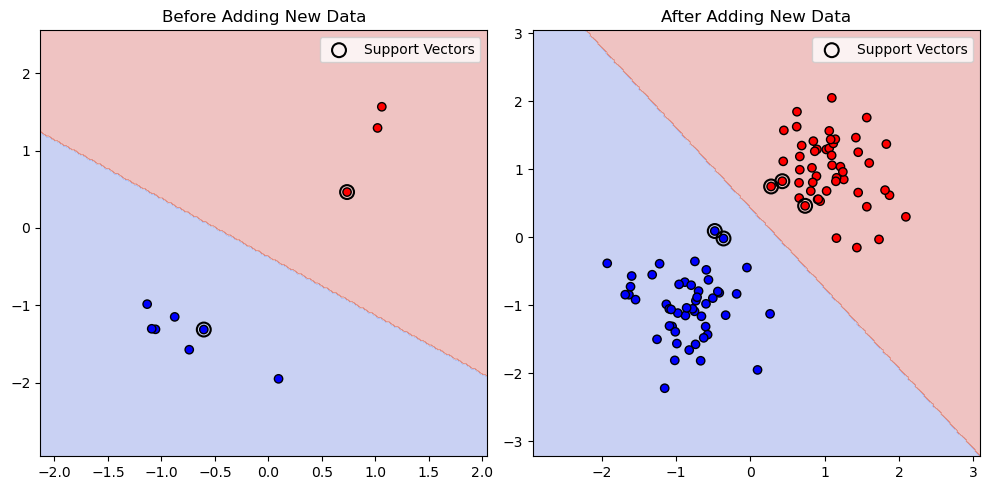

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Generate dataset with overlap
np.random.seed(1)
classA = np.random.randn(50, 2) * 0.5 + [1, 1]
classB = np.random.randn(50, 2) * 0.5 + [-1, -1]
X = np.vstack((classA, classB))
y = np.hstack((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))

# Shuffle dataset
permute = np.random.permutation(len(X))
X, y = X[permute], y[permute]

# Split dataset into two parts (incremental learning)
split_ratio = 0.1
split_index = int(len(X) * split_ratio)

X_train_initial, y_train_initial = X[:split_index], y[:split_index]  # Initial Training Data
X_new, y_new = X[split_index:], y[split_index:]  # New Data to be added

# Decision boundary plotting function
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr)
    
    # Highlight support vectors
    sv = model.support_vectors_
    plt.scatter(sv[:, 0], sv[:, 1], s=100, facecolors='none', edgecolors='black', linewidth=1.5, label="Support Vectors")

    plt.title(title)
    plt.legend()

# Train SVM on initial data
C_value = 1.0  # Moderate C for flexibility
model = SVC(kernel='linear', C=C_value)
model.fit(X_train_initial, y_train_initial)

# Plot decision boundary before adding new data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model, X_train_initial, y_train_initial, title="Before Adding New Data")

# Incrementally add new data
X_combined = np.vstack((X_train_initial, X_new))
y_combined = np.hstack((y_train_initial, y_new))

# Retrain SVM on the expanded dataset
model.fit(X_combined, y_combined)

# Plot decision boundary after adding new data
plt.subplot(1, 2, 2)
plot_decision_boundary(model, X_combined, y_combined, title="After Adding New Data")

plt.tight_layout()
plt.show()


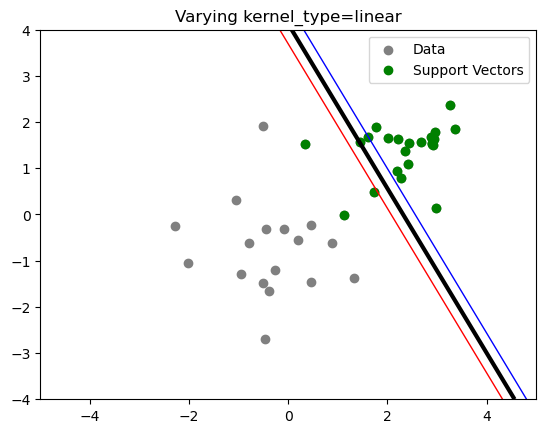

Results for Varying kernel_type=linear
Support Vectors: 23


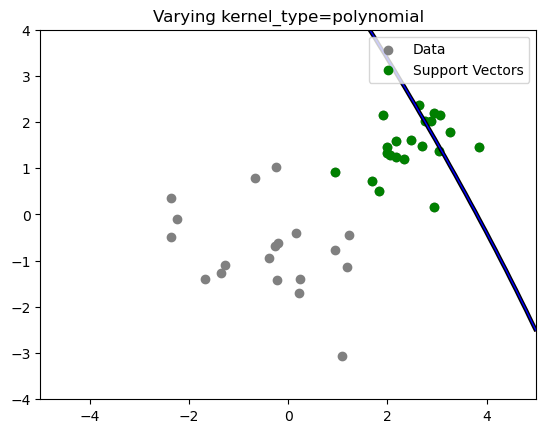

Results for Varying kernel_type=polynomial
Support Vectors: 21


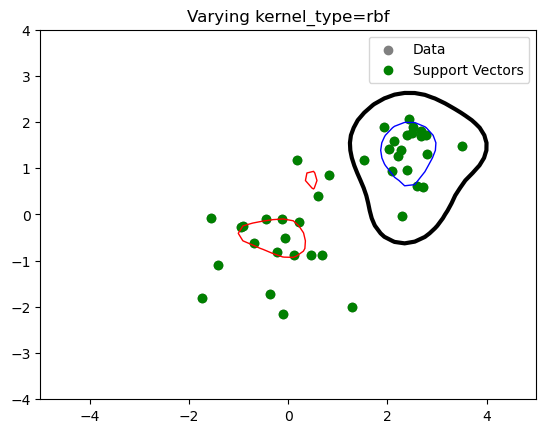

Results for Varying kernel_type=rbf
Support Vectors: 40


In [ ]:
import numpy as np
import random
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Step 1: Define the modifiable input vector with multiple values for each parameter
input_params = {
    "classA_mean": [[2.5, 1.5], [-2.5, -1.5], [1.0, 0.0], [-1.0, 1.0]],  
    "classA_std": [0.5, 1.0, 0.2, 0.8],  
    "classB_mean": [[0.0, -0.5], [1.0, 1.5], [-1.0, -1.0], [2.0, 0.5]],  
    "classB_std": [1.0, 0.5, 0.2, 0.8],  
    "kernel_type": ["linear", "polynomial", "rbf"],  
    "p_degree": [2, 3, 5],  
    "sigma": [0.1, 0.5, 1.0, 2.0],  
    "C_values": [0.01, 1, 10]  
}

# Step 2: Default fixed values
fixed_values = {
    "classA_mean": [2.5, 1.5],
    "classA_std": 0.5,
    "classB_mean": [0.0, -0.5],
    "classB_std": 1.0,
    "kernel_type": "linear",
    "p_degree": 3,
    "sigma": 0.5,
    "C_values": 1
}

# Function to generate synthetic data
def generate_data(params):
    classA = np.concatenate([
        np.random.randn(10, 2) * params["classA_std"] + params["classA_mean"],
        np.random.randn(10, 2) * params["classA_std"] + params["classA_mean"]
    ])
    
    classB = np.random.randn(20, 2) * params["classB_std"] + params["classB_mean"]
    
    inputs = np.concatenate((classA, classB))
    targets = np.concatenate((np.ones(classA.shape[0]), -np.ones(classB.shape[0])))
    
    # Shuffle data
    N = inputs.shape[0]
    permute = list(range(N))
    random.shuffle(permute)
    
    return inputs[permute, :], targets[permute]

# Kernel functions
def linear_kernel(x, y):
    return np.dot(x, y)

def polynomial_kernel(x, y, p):
    return (np.dot(x, y) + 1) ** p

def rbf_kernel(x, y, sigma):
    return np.exp(-np.linalg.norm(x - y) ** 2 / (2 * sigma ** 2))

# Function to get kernel
def get_kernel_function(params):
    kernel_map = {
        "linear": linear_kernel,
        "polynomial": lambda x, y: polynomial_kernel(x, y, params["p_degree"]),
        "rbf": lambda x, y: rbf_kernel(x, y, params["sigma"])
    }
    return kernel_map[params["kernel_type"]]

# Function to compute optimization objective
def compute_P_matrix(inputs, targets, kernel_func):
    N = inputs.shape[0]
    P = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            P[i, j] = targets[i] * targets[j] * kernel_func(inputs[i], inputs[j])
    return P

# Objective function for optimization
def objective(alpha, P):
    return 0.5 * np.sum(alpha * alpha * P) - np.sum(alpha)

def zerofun(alpha, targets):
    return np.dot(alpha, targets)

# Function to perform SVM training
def train_svm(inputs, targets, params):
    kernel_func = get_kernel_function(params)
    P = compute_P_matrix(inputs, targets, kernel_func)
    
    N = inputs.shape[0]
    bounds = [(0, params["C_values"]) for _ in range(N)]
    
    result = minimize(
        lambda alpha: objective(alpha, P),
        np.zeros(N),
        bounds=bounds,
        constraints={'type': 'eq', 'fun': lambda alpha: zerofun(alpha, targets)}
    )
    
    if not result.success:
        print(f"Optimization failed for {params}")
        return None, None
    
    alphas = result.x
    threshold = 1e-5
    support_vectors = [(inputs[i], targets[i], alphas[i]) for i in range(N) if alphas[i] > threshold]
    
    return support_vectors, kernel_func

# Compute bias term
def compute_b(support_vectors, kernel_func):
    sv_x, sv_t, sv_alpha = support_vectors[0]
    sum_term = sum(alpha * t * kernel_func(sv_x, x) for x, t, alpha in support_vectors)
    return sum_term - sv_t

# Indicator function
def indicator(s, support_vectors, kernel_func, b):
    return sum(alpha * t * kernel_func(s, x) for x, t, alpha in support_vectors) - b

# Function to run experiment
def run_experiment(varying_param):
    for value in input_params[varying_param]:
        params = fixed_values.copy()
        params[varying_param] = value
        
        inputs, targets = generate_data(params)
        support_vectors, kernel_func = train_svm(inputs, targets, params)
        
        if not support_vectors:
            continue
        
        b = compute_b(support_vectors, kernel_func)
        
        xgrid = np.linspace(-5, 5, 50)
        ygrid = np.linspace(-4, 4, 50)
        grid = np.array([[indicator(np.array([x, y]), support_vectors, kernel_func, b) for x in xgrid] for y in ygrid])
        
        plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('red', 'black', 'blue'), linewidths=(1, 3, 1))
        plt.title(f"Varying {varying_param}={value}")
        plt.scatter(inputs[:, 0], inputs[:, 1], color='gray', label='Data')
        plt.scatter([sv[0][0] for sv in support_vectors], [sv[0][1] for sv in support_vectors], color='green', label='Support Vectors')
        plt.legend()
        plt.show()

        print(f"Results for Varying {varying_param}={value}")
        print(f"Support Vectors: {len(support_vectors)}")

# Run with varying parameter
varying_param = "kernel_type"  # Change this to test different variables
run_experiment(varying_param)
